In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

In [2]:
X_train = pd.read_csv('/kaggle/input/nonnormaliseddtraindataset/X_train.csv')
Y_train = pd.read_csv('/kaggle/input/nonnormaliseddtraindataset/Y_train.csv')

# Sampling (train dataset)
**Under Sampling - Benign (99% of data)** - Random Sampling

**Over Sampling - Malicious (1% of data)** - SMOTE Sampling

# Undersampling
[https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/](http://)


# Under Sampling using Random

In [5]:
X_train.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,6,1002,3,0,77,0,46,0,25.666667,23.459184,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,6,5931046,4,4,97,231,97,0,24.250000,48.500000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2,6,86103821,2,0,0,0,0,0,0.000000,0.000000,...,0,20,0.0,0.0,0,0,86103821.0,0.0,86103821,86103821
3,6,1222081,7,5,364,582,103,0,52.000000,49.217206,...,4,20,0.0,0.0,0,0,0.0,0.0,0,0
4,6,86238618,2,0,0,0,0,0,0.000000,0.000000,...,0,20,0.0,0.0,0,0,86238618.0,0.0,86238618,86238618


In [3]:
counter = Counter(Y_train['Label'])
print(counter)

Counter({'Benign': 1643189, 'SSH-Bruteforce': 75238, 'Brute Force -Web': 444, 'Brute Force -XSS': 182, 'SQL Injection': 67, 'FTP-BruteForce': 43})


In [6]:
counter = Counter(Y_train['Label'])
print(counter)

undersampling_strategy = {
    'Benign': 859582,  
}

undersample = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state = 42)
X_train_random, Y_train_random = undersample.fit_resample(X_train, Y_train['Label'])
counter = Counter(Y_train_random)
print(counter)

Counter({'Benign': 1643189, 'SSH-Bruteforce': 75238, 'Brute Force -Web': 444, 'Brute Force -XSS': 182, 'SQL Injection': 67, 'FTP-BruteForce': 43})
Counter({'Benign': 859582, 'SSH-Bruteforce': 75238, 'Brute Force -Web': 444, 'Brute Force -XSS': 182, 'SQL Injection': 67, 'FTP-BruteForce': 43})


In [7]:
Y_train_random.head()

183126     Benign
1205220    Benign
652561     Benign
1348613    Benign
1326358    Benign
Name: Label, dtype: object

# Over Sampling
[https://www.kaggle.com/code/residentmario/oversampling-with-smote-and-adasyn/notebook](http://)


# Over Sampling using SMOTE
* SMOTE()
* SMOTE(kind='borderline1')
* SMOTE(kind='borderline2')
* SMOTE(kind='svm')

In [8]:
counter = Counter(Y_train_random)
print("Y",counter)

sampling_strategy_dict = {
    'Brute Force -Web':171916,
    'Brute Force -XSS':171916,
    'FTP-BruteForce':171916,
    'SQL Injection':171916,
    'SSH-Bruteforce':171916
}

oversample = SMOTE(sampling_strategy = sampling_strategy_dict)
X_train_SMOTE, Y_train_SMOTE = oversample.fit_resample(X_train_random, Y_train_random)
counter = Counter(Y_train_SMOTE)
print("Y", counter)

Y Counter({'Benign': 859582, 'SSH-Bruteforce': 75238, 'Brute Force -Web': 444, 'Brute Force -XSS': 182, 'SQL Injection': 67, 'FTP-BruteForce': 43})
Y Counter({'Benign': 859582, 'Brute Force -Web': 171916, 'Brute Force -XSS': 171916, 'FTP-BruteForce': 171916, 'SQL Injection': 171916, 'SSH-Bruteforce': 171916})


In [9]:
Y_train_SMOTE.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Label, dtype: object

In [10]:
Y_train_SMOTE = pd.DataFrame(Y_train_SMOTE)

In [11]:
Y_train_SMOTE.head()

,Label
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign


In [ ]:
type(Y_train_SMOTE['Label'])

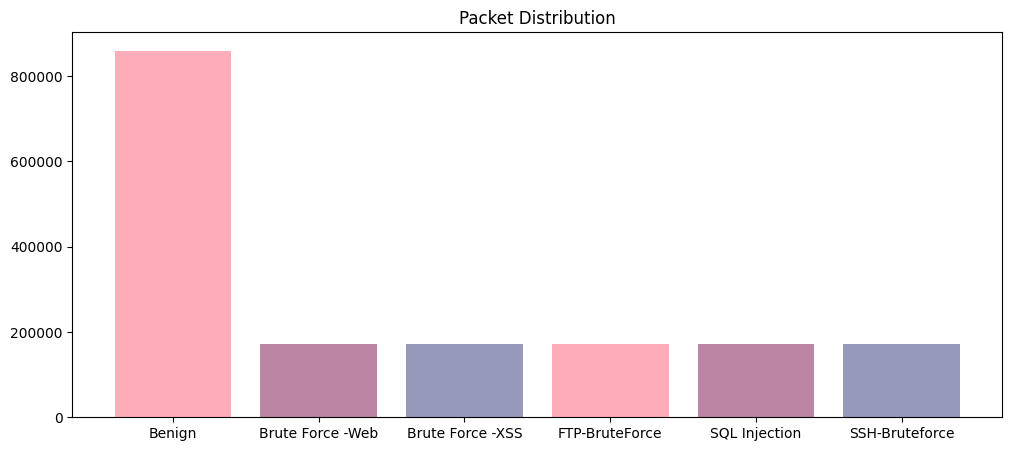

In [12]:
colors = ['#feadb9','#bc85a3','#9799ba']
plt.figure(figsize=(12, 5))
plt.title('Packet Distribution')
plt.bar(x=Y_train_SMOTE['Label'].unique(), height=Y_train_SMOTE['Label'].value_counts(), color = colors)
p = plt.gcf()

# One Hot Encoding

In [13]:
Y_train_SMOTE['Label'] = Y_train_SMOTE['Label'].astype('category')
Y_train_SMOTE['Label_new'] = Y_train_SMOTE['Label'].cat.codes
enc = OneHotEncoder()
enc_df_train = pd.DataFrame(enc.fit_transform(Y_train_SMOTE[['Label_new']]).toarray())
RandomSamplingSMOTE_train = pd.concat([X_train_SMOTE, enc_df_train], axis=1)
RandomSamplingSMOTE_train.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Idle Mean,Idle Std,Idle Max,Idle Min,0,1,2,3,4,5
0,6,117986095,11,9,875,355,517,0,79.545455,154.043087,...,5.862518e+07,374022.010588,58889657,58360710,1.0,0.0,0.0,0.0,0.0,0.0
1,6,86160336,2,0,0,0,0,0,0.000000,0.000000,...,8.616034e+07,0.000000,86160336,86160336,1.0,0.0,0.0,0.0,0.0,0.0
2,6,3769550,14,8,1439,1731,725,0,102.785714,191.197111,...,0.000000e+00,0.000000,0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,6,61337501,21,19,2727,9591,724,0,129.857143,242.631054,...,9.990232e+06,32318.260496,10003474,9924263,1.0,0.0,0.0,0.0,0.0,0.0
4,17,2573,1,1,30,207,30,30,30.000000,0.000000,...,0.000000e+00,0.000000,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
num_rows, num_columns = RandomSamplingSMOTE_train.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1719162
Number of columns: 75


In [15]:
RandomSamplingSMOTE_train.to_csv('RandomSamplingSMOTE_train_Sampled_NOINF_nonnorm.csv', index=False) 